In [10]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [28]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_0p25GeV_0p002mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", "2mu2e"]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base"  

    ],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj
Not applying any cuts to the lepton jets for channel  baseNoLj


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc18473aee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

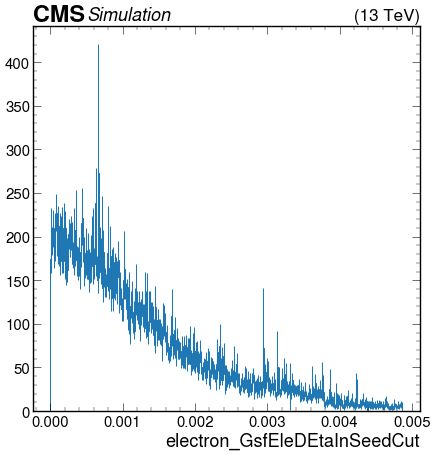

In [30]:
utilities.plot(out["2Mu2E_100GeV_0p25GeV_0p02mm"]["hists"]["electron_GsfEleDEtaInSeedCut"][channels [0],:])